## Índice

 <a id="top"></a> <br>
**Conteúdo do *Notebook***
1. [Introdução](#1)
2. [Instalando as dependências](#2)
3. [Formatando os dados](#3)
4. [Ilustrando para um metabólito](#4)
5. [Executando a análise univariada para todos os metabólitos](#5)
6. [Volcano plot](#6)

 <a id="1"></a> <br>
## 1 - Introdução

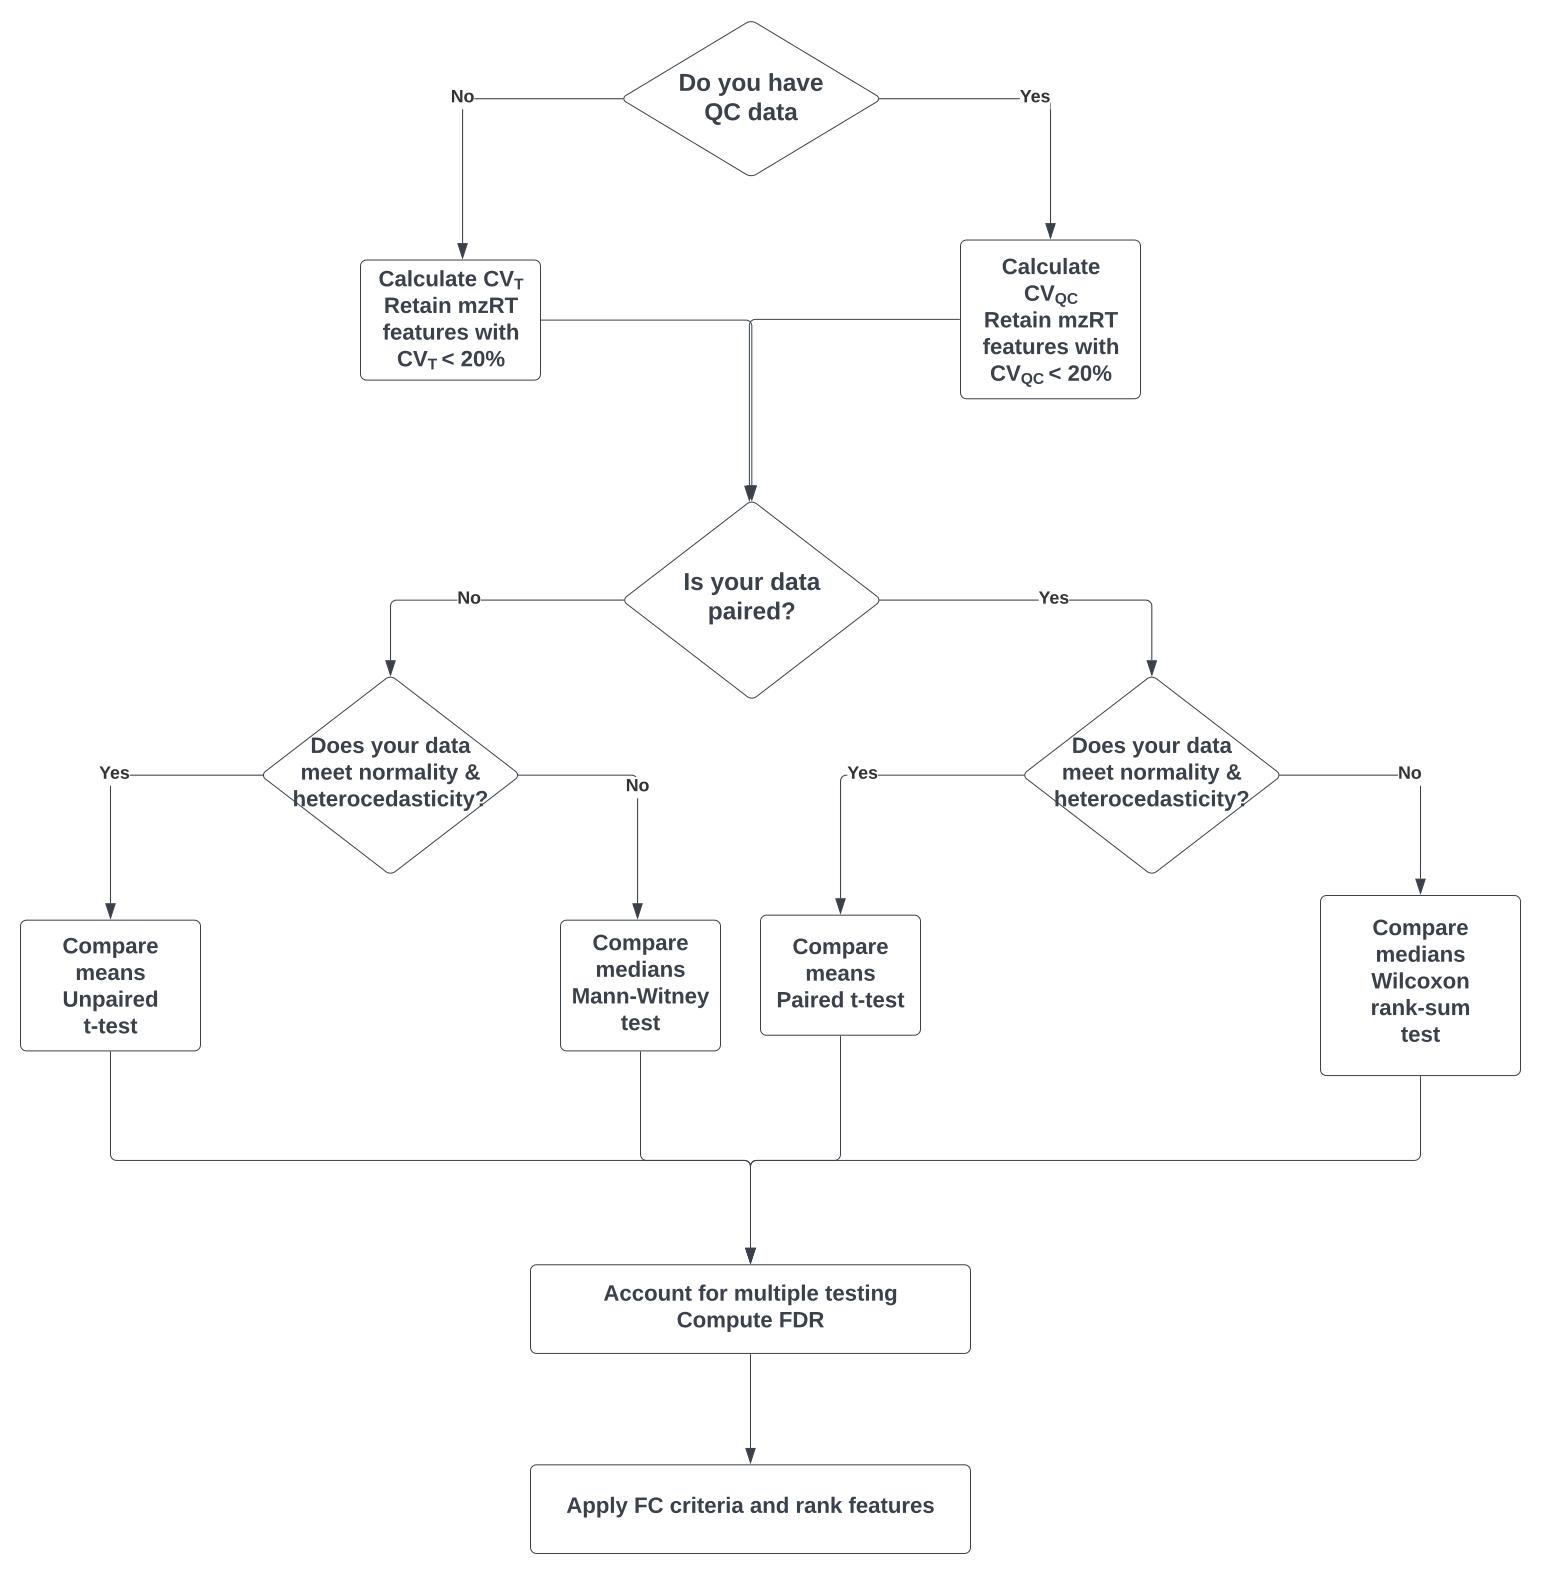

In [150]:
from IPython.display import Image
Image(open('univariate guide.png','rb').read())

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3901240

 <a id="2"></a> <br>
## 2 - Instalando as dependências

A versão padrão do colab fornece um grande número de pacotes pré instalados. É possível instalar pacotes adicionais, expandindo o repertório de análises possíveis.

In [1]:
!pip install statannotations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
!pip install scikit_posthocs

 <a id="3"></a> <br>
## 3 - Formatando os dados

Antes das análises estatísticas é necessário que os dados estejam em um formato adequado para utilização dos métodos de cada biblioteca escolhida.

In [7]:
# Carregando pacotes
import pandas as pd
import requests
import io

In [4]:
# Use interrogacao para acessar programas linha de comando do linux
# wget baixa o arquivo de um link fornecido
# features preset eh um formato alternativo do mzmine
!wget http://seriema.fcfrp.usp.br/static/features_preset.zip

--2023-11-22 11:37:00--  http://seriema.fcfrp.usp.br/static/features_preset.zip
Resolving seriema.fcfrp.usp.br (seriema.fcfrp.usp.br)... 143.107.202.105
Connecting to seriema.fcfrp.usp.br (seriema.fcfrp.usp.br)|143.107.202.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12183449 (12M) [application/zip]
Saving to: ‘features_preset.zip’

features_preset.zip 100%[===================>]  11.62M  6.35MB/s    in 1.8s    

2023-11-22 11:37:02 (6.35 MB/s) - ‘features_preset.zip’ saved [12183449/12183449]



In [5]:
# Descompactar o arquivo
!unzip features_preset.zip

Archive:  features_preset.zip
  inflating: features.csv            


In [8]:
# Ler as tabelas de dados presentes no diretorio de trabalho
# clique no icone da pastinha ao lado, o arquivo tem que estar listado na pasta
# para ser lido
feat = pd.read_csv('features.csv')
meta = pd.read_csv('metadata_dom_interlab_lab2.txt', sep='\t')

In [9]:
# Inspeciona o cabecalho da planilha
feat.head()

,id,area,rt,mz_range:min,mz_range:max,charge,fragment_scans,alignment_scores:rate,alignment_scores:aligned_features_n,alignment_scores:align_extra_features,...,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:rt_range:max,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:feature_state,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:mz,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:intensity_range:min,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:intensity_range:max,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:asymmetry_factor,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:isotopes,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:tailing_factor,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:height,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:rt_ms2_apex_distance
0,1,5705.0,0.3557,303.92151,303.92212,NaN,0,0.077,1,0,...,0.3821,ESTIMATED,303.92172,13800.0,13800.0,0.9995,NaN,0.9997,13800.0,NaN
1,2,1011.0,0.4352,165.10239,165.10255,NaN,0,0.077,1,0,...,0.4858,ESTIMATED,165.10240,10010.0,14140.0,0.9998,NaN,0.9999,14140.0,NaN
2,3,1457.0,0.4029,167.11795,167.11807,NaN,0,0.077,1,0,...,0.4254,ESTIMATED,167.11802,10560.0,11710.0,0.9891,NaN,0.9945,11710.0,NaN
3,4,16710.0,0.4982,164.13646,164.13646,NaN,0,0.077,1,0,...,0.5366,ESTIMATED,164.13638,11160.0,11160.0,0.6437,NaN,0.8219,11160.0,NaN
4,5,13960.0,0.5310,208.16228,208.16278,1.0,0,0.077,1,0,...,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
meta.head()

,filename,ATTRIBUTE_Sample,ATTRIBUTE_Sample_Type,ATTRIBUTE_Time-Point
0,Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,A5M,Sample,5.0
1,Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,A5M,Sample,5.0
2,Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,A5M,Sample,5.0
3,Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,A15M,Sample,15.0
4,Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,A15M,Sample,15.0


In [11]:
meta.shape

(13, 4)

In [12]:
meta.set_index('filename', inplace=True)

In [13]:
meta

,ATTRIBUTE_Sample,ATTRIBUTE_Sample_Type,ATTRIBUTE_Time-Point
filename,,,
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,A5M,Sample,5.0
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,A5M,Sample,5.0
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,A5M,Sample,5.0
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,A15M,Sample,15.0
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,A15M,Sample,15.0
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,A15M,Sample,15.0
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML,A45M,Sample,45.0
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep2.mzML,A45M,Sample,45.0
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep3.mzML,A45M,Sample,45.0


In [ ]:
feat[feat.columns[feat.columns.str.contains('area')]]

,area,datafile:Interlab-LC-MS_Lab2_PPL_Pos_MS2_Rep1.mzML:area,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML:area,datafile:Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML:area,datafile:Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML:area,datafile:Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML:area,datafile:Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML:area,datafile:Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML:area,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML:area,datafile:Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML:area,datafile:Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML:area,datafile:Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep2.mzML:area,datafile:Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep3.mzML:area,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:area
0,5705.0,5705.0,149.10,89.26,135.80,118.9,156.10,217.20,64.03,86.08,101.9,184.00,228.10,61.5
1,1011.0,911.0,91.42,81.41,140.10,1011.0,288.50,81.92,NaN,230.60,114.5,184.00,70.09,156.0
2,1457.0,413.1,88.61,62.66,78.08,1457.0,76.17,93.67,65.76,127.10,158.2,46.72,50.04,251.7
3,16710.0,16710.0,126.60,101.00,71.06,154.5,117.40,81.25,252.70,44.89,129.9,93.81,56.38,83.4
4,13960.0,13960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27559,40300.0,40300.0,3739.00,974.10,3841.00,828.5,1569.00,3610.00,478.10,3434.00,3141.0,1279.00,2639.00,2891.0
27560,19960.0,2062.0,475.30,730.60,401.80,19960.0,921.40,3449.00,753.20,1018.00,3050.0,1554.00,3392.00,2472.0
27561,52560.0,11780.0,52560.00,46890.00,1446.00,7540.0,14910.00,14330.00,17860.00,6321.00,14000.0,16210.00,8267.00,13990.0
27562,34190.0,NaN,34190.00,318.90,2965.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
feat.set_index('id', inplace=True)
feat

,area,rt,mz_range:min,mz_range:max,charge,fragment_scans,alignment_scores:rate,alignment_scores:aligned_features_n,alignment_scores:align_extra_features,alignment_scores:weighted_distance_score,...,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:rt_range:max,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:feature_state,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:mz,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:intensity_range:min,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:intensity_range:max,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:asymmetry_factor,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:isotopes,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:tailing_factor,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:height,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:rt_ms2_apex_distance
id,,,,,,,,,,,,,,,,,,,,,
1,5705.0,0.3557,303.92151,303.92212,NaN,0,0.077,1,0,1.000,...,0.3821,ESTIMATED,303.92172,13800.0,13800.0,0.9995,NaN,0.9997,13800.0,NaN
2,1011.0,0.4352,165.10239,165.10255,NaN,0,0.077,1,0,1.000,...,0.4858,ESTIMATED,165.10240,10010.0,14140.0,0.9998,NaN,0.9999,14140.0,NaN
3,1457.0,0.4029,167.11795,167.11807,NaN,0,0.077,1,0,1.000,...,0.4254,ESTIMATED,167.11802,10560.0,11710.0,0.9891,NaN,0.9945,11710.0,NaN
4,16710.0,0.4982,164.13646,164.13646,NaN,0,0.077,1,0,1.000,...,0.5366,ESTIMATED,164.13638,11160.0,11160.0,0.6437,NaN,0.8219,11160.0,NaN
5,13960.0,0.5310,208.16228,208.16278,1.0,0,0.077,1,0,1.000,...,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27710,40300.0,14.3853,174.07603,174.07617,NaN,0,0.077,1,0,1.000,...,14.3637,ESTIMATED,174.07609,25850.0,53380.0,0.0772,NaN,0.5386,53380.0,NaN
27711,19960.0,14.4755,450.35718,450.35812,NaN,0,0.077,1,0,1.000,...,14.5273,ESTIMATED,450.35738,21810.0,45370.0,0.4387,NaN,0.7194,45370.0,NaN
27712,52560.0,14.5268,175.98781,175.98796,NaN,0,0.154,2,0,0.963,...,14.5904,ESTIMATED,175.98787,62500.0,99660.0,0.8836,NaN,0.9418,99660.0,NaN


In [15]:
feat[feat.columns[feat.columns.str.contains('area')]].drop('area', axis=1)

,datafile:Interlab-LC-MS_Lab2_PPL_Pos_MS2_Rep1.mzML:area,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML:area,datafile:Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML:area,datafile:Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML:area,datafile:Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML:area,datafile:Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML:area,datafile:Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML:area,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML:area,datafile:Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML:area,datafile:Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML:area,datafile:Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep2.mzML:area,datafile:Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep3.mzML:area,datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML:area
id,,,,,,,,,,,,,
1,5705.0,149.10,89.26,135.80,118.9,156.10,217.20,64.03,86.08,101.9,184.00,228.10,61.5
2,911.0,91.42,81.41,140.10,1011.0,288.50,81.92,NaN,230.60,114.5,184.00,70.09,156.0
3,413.1,88.61,62.66,78.08,1457.0,76.17,93.67,65.76,127.10,158.2,46.72,50.04,251.7
4,16710.0,126.60,101.00,71.06,154.5,117.40,81.25,252.70,44.89,129.9,93.81,56.38,83.4
5,13960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27710,40300.0,3739.00,974.10,3841.00,828.5,1569.00,3610.00,478.10,3434.00,3141.0,1279.00,2639.00,2891.0
27711,2062.0,475.30,730.60,401.80,19960.0,921.40,3449.00,753.20,1018.00,3050.0,1554.00,3392.00,2472.0
27712,11780.0,52560.00,46890.00,1446.00,7540.0,14910.00,14330.00,17860.00,6321.00,14000.0,16210.00,8267.00,13990.0


In [16]:
feat = feat[feat.columns[feat.columns.str.contains('area')]].drop('area', axis=1).T
feat

id,1,2,3,4,5,6,7,8,9,10,...,27705,27706,27707,27708,27709,27710,27711,27712,27713,27714
datafile:Interlab-LC-MS_Lab2_PPL_Pos_MS2_Rep1.mzML:area,5705.00,911.00,413.10,16710.00,13960.0,3239.0,NaN,1969.0,NaN,3156.0,...,78290.0,9866.0,8157.0,446.8,230.4,40300.0,2062.0,11780.0,NaN,955.60
datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML:area,149.10,91.42,88.61,126.60,NaN,238.9,NaN,6681.0,2595.0,11920.0,...,102000.0,47110.0,14580.0,NaN,NaN,3739.0,475.3,52560.0,34190.0,NaN
datafile:Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML:area,89.26,81.41,62.66,101.00,NaN,190.0,79.88,4794.0,1443.0,6089.0,...,84610.0,30960.0,11030.0,NaN,NaN,974.1,730.6,46890.0,318.9,NaN
datafile:Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML:area,135.80,140.10,78.08,71.06,NaN,660.9,NaN,7469.0,2427.0,14420.0,...,93690.0,7087.0,3285.0,NaN,NaN,3841.0,401.8,1446.0,2965.0,NaN
datafile:Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML:area,118.90,1011.00,1457.00,154.50,NaN,5649.0,6466.00,5464.0,1516.0,5303.0,...,130000.0,15310.0,16350.0,NaN,NaN,828.5,19960.0,7540.0,NaN,NaN
datafile:Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML:area,156.10,288.50,76.17,117.40,NaN,4532.0,396.70,7580.0,3840.0,9219.0,...,121400.0,14820.0,14650.0,NaN,NaN,1569.0,921.4,14910.0,NaN,NaN
datafile:Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML:area,217.20,81.92,93.67,81.25,NaN,1590.0,1726.00,9515.0,3149.0,11000.0,...,130000.0,13790.0,20230.0,NaN,NaN,3610.0,3449.0,14330.0,NaN,75.83
datafile:Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML:area,64.03,NaN,65.76,252.70,NaN,3709.0,1739.00,10700.0,2762.0,8875.0,...,164000.0,886.2,19660.0,41470.0,28110.0,478.1,753.2,17860.0,NaN,23930.00
datafile:Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML:area,86.08,230.60,127.10,44.89,NaN,1647.0,532.50,4892.0,1411.0,7155.0,...,121400.0,4412.0,15230.0,NaN,NaN,3434.0,1018.0,6321.0,NaN,NaN
datafile:Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML:area,101.90,114.50,158.20,129.90,NaN,4654.0,3642.00,26250.0,28800.0,37370.0,...,135300.0,10930.0,15780.0,109.4,NaN,3141.0,3050.0,14000.0,NaN,137.70


In [17]:
feat.index = feat.index.str.replace('datafile:|:area', '')

<ipython-input-17-d2c77acc1242>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  feat.index = feat.index.str.replace('datafile:|:area', '')


In [18]:
feat

id,1,2,3,4,5,6,7,8,9,10,...,27705,27706,27707,27708,27709,27710,27711,27712,27713,27714
Interlab-LC-MS_Lab2_PPL_Pos_MS2_Rep1.mzML,5705.00,911.00,413.10,16710.00,13960.0,3239.0,NaN,1969.0,NaN,3156.0,...,78290.0,9866.0,8157.0,446.8,230.4,40300.0,2062.0,11780.0,NaN,955.60
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML,149.10,91.42,88.61,126.60,NaN,238.9,NaN,6681.0,2595.0,11920.0,...,102000.0,47110.0,14580.0,NaN,NaN,3739.0,475.3,52560.0,34190.0,NaN
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,89.26,81.41,62.66,101.00,NaN,190.0,79.88,4794.0,1443.0,6089.0,...,84610.0,30960.0,11030.0,NaN,NaN,974.1,730.6,46890.0,318.9,NaN
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,135.80,140.10,78.08,71.06,NaN,660.9,NaN,7469.0,2427.0,14420.0,...,93690.0,7087.0,3285.0,NaN,NaN,3841.0,401.8,1446.0,2965.0,NaN
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,118.90,1011.00,1457.00,154.50,NaN,5649.0,6466.00,5464.0,1516.0,5303.0,...,130000.0,15310.0,16350.0,NaN,NaN,828.5,19960.0,7540.0,NaN,NaN
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,156.10,288.50,76.17,117.40,NaN,4532.0,396.70,7580.0,3840.0,9219.0,...,121400.0,14820.0,14650.0,NaN,NaN,1569.0,921.4,14910.0,NaN,NaN
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,217.20,81.92,93.67,81.25,NaN,1590.0,1726.00,9515.0,3149.0,11000.0,...,130000.0,13790.0,20230.0,NaN,NaN,3610.0,3449.0,14330.0,NaN,75.83
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML,64.03,NaN,65.76,252.70,NaN,3709.0,1739.00,10700.0,2762.0,8875.0,...,164000.0,886.2,19660.0,41470.0,28110.0,478.1,753.2,17860.0,NaN,23930.00
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,86.08,230.60,127.10,44.89,NaN,1647.0,532.50,4892.0,1411.0,7155.0,...,121400.0,4412.0,15230.0,NaN,NaN,3434.0,1018.0,6321.0,NaN,NaN
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML,101.90,114.50,158.20,129.90,NaN,4654.0,3642.00,26250.0,28800.0,37370.0,...,135300.0,10930.0,15780.0,109.4,NaN,3141.0,3050.0,14000.0,NaN,137.70


In [19]:
!unzip FeatureTable_NoNorm_Metaboanalyst.zip

Archive:  FeatureTable_NoNorm_Metaboanalyst.zip
  inflating: FeatureTable_NoNorm_Metaboanalyst.csv  


In [20]:
metab = pd.read_csv('FeatureTable_NoNorm_Metaboanalyst.csv')
metab.head()

,Filename,Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML,Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML,Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML,Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML,Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep2.mzML,Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep3.mzML
0,Timepoints,1.500000e+01,1.500000e+01,5.000000e+00,1.500000e+01,5.000000e+00,5.000000e+00,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,4.500000e+01,4.500000e+01
1,1/158.0032mz/0.59min,4.396434e+04,4.187189e+04,2.900190e+04,3.721182e+04,1.553754e+04,2.764974e+04,4.101787e+04,1.013497e+05,2.898705e+04,4.439401e+04,1.202697e+05,1.276090e+05
2,2/192.0618mz/0.61min,3.043412e+05,3.498125e+05,4.153799e+05,3.258101e+05,3.828027e+05,3.818944e+05,3.814224e+05,3.449605e+05,3.789857e+05,3.585905e+05,3.521209e+05,3.340112e+05
3,3/151.0355mz/0.61min,2.530460e+06,2.556151e+06,2.809312e+06,2.504642e+06,2.725864e+06,2.881478e+06,2.840429e+06,2.378518e+06,2.715104e+06,2.734096e+06,2.534783e+06,2.551428e+06
4,4/164.0670mz/0.61min,2.636837e+05,3.064931e+05,3.517891e+05,2.727254e+05,3.068172e+05,3.272971e+05,3.692202e+05,3.001941e+05,3.327033e+05,3.266189e+05,3.099458e+05,2.838673e+05


In [28]:
metab.shape

(13, 2452)

In [22]:
metab = metab.T
metab.index

Index(['Filename', 'Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML',
       'Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML',
       'Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML',
       'Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML',
       'Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML',
       'Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML',
       'Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML',
       'Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML',
       'Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML',
       'Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML',
       'Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep2.mzML',
       'Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep3.mzML'],
      dtype='object')

In [29]:
metab.iloc[0,:].tolist()

['Timepoints',
 '1/158.0032mz/0.59min',
 '2/192.0618mz/0.61min',
 '3/151.0355mz/0.61min',
 '4/164.0670mz/0.61min',
 '5/208.0395mz/0.62min',
 '6/167.0129mz/0.62min',
 '7/266.1601mz/0.67min',
 '8/439.1425mz/0.70min',
 '9/341.0520mz/0.70min',
 '10/363.0338mz/0.70min',
 '11/365.1060mz/0.71min',
 '12/336.0972mz/0.72min',
 '13/236.1497mz/0.72min',
 '14/261.1086mz/0.71min',
 '15/255.1078mz/0.72min',
 '16/272.1346mz/0.72min',
 '17/277.0901mz/0.72min',
 '18/360.1509mz/0.72min',
 '19/245.1138mz/0.72min',
 '20/333.1301mz/0.72min',
 '21/178.1075mz/0.73min',
 '22/222.0977mz/0.73min',
 '23/192.1231mz/0.74min',
 '24/201.1235mz/0.73min',
 '25/266.1241mz/0.74min',
 '26/307.1507mz/0.74min',
 '27/310.1504mz/0.74min',
 '28/296.1351mz/0.74min',
 '29/206.1390mz/0.74min',
 '30/217.0688mz/0.74min',
 '31/280.1397mz/0.75min',
 '32/305.0851mz/0.75min',
 '33/204.0870mz/0.75min',
 '34/379.1218mz/0.75min',
 '35/266.1604mz/0.75min',
 '36/275.1244mz/0.75min',
 '37/324.1661mz/0.75min',
 '38/250.1655mz/0.75min',
 '39/1

In [32]:
df = pd.merge(meta, feat, left_index=True, right_index=True)
df

,ATTRIBUTE_Sample,ATTRIBUTE_Sample_Type,ATTRIBUTE_Time-Point,1,2,3,4,5,6,7,...,27705,27706,27707,27708,27709,27710,27711,27712,27713,27714
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,A5M,Sample,5.0,89.26,81.41,62.66,101.00,NaN,190.0,79.88,...,84610.0,30960.0,11030.0,NaN,NaN,974.1,730.6,46890.0,318.9,NaN
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,A5M,Sample,5.0,86.08,230.60,127.10,44.89,NaN,1647.0,532.50,...,121400.0,4412.0,15230.0,NaN,NaN,3434.0,1018.0,6321.0,NaN,NaN
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,A5M,Sample,5.0,118.90,1011.00,1457.00,154.50,NaN,5649.0,6466.00,...,130000.0,15310.0,16350.0,NaN,NaN,828.5,19960.0,7540.0,NaN,NaN
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,A15M,Sample,15.0,135.80,140.10,78.08,71.06,NaN,660.9,NaN,...,93690.0,7087.0,3285.0,NaN,NaN,3841.0,401.8,1446.0,2965.0,NaN
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,A15M,Sample,15.0,217.20,81.92,93.67,81.25,NaN,1590.0,1726.00,...,130000.0,13790.0,20230.0,NaN,NaN,3610.0,3449.0,14330.0,NaN,75.83
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,A15M,Sample,15.0,156.10,288.50,76.17,117.40,NaN,4532.0,396.70,...,121400.0,14820.0,14650.0,NaN,NaN,1569.0,921.4,14910.0,NaN,NaN
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML,A45M,Sample,45.0,101.90,114.50,158.20,129.90,NaN,4654.0,3642.00,...,135300.0,10930.0,15780.0,109.4,NaN,3141.0,3050.0,14000.0,NaN,137.70
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep2.mzML,A45M,Sample,45.0,184.00,184.00,46.72,93.81,NaN,2721.0,2480.00,...,123200.0,9045.0,1548.0,NaN,NaN,1279.0,1554.0,16210.0,NaN,NaN
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep3.mzML,A45M,Sample,45.0,228.10,70.09,50.04,56.38,NaN,3890.0,2848.00,...,91700.0,2861.0,17770.0,NaN,NaN,2639.0,3392.0,8267.0,NaN,NaN
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML,M,Sample,0.0,64.03,NaN,65.76,252.70,NaN,3709.0,1739.00,...,164000.0,886.2,19660.0,41470.0,28110.0,478.1,753.2,17860.0,NaN,23930.00


In [30]:
metab.columns = metab.iloc[0,:].tolist()
metab.head()

,Timepoints,1/158.0032mz/0.59min,2/192.0618mz/0.61min,3/151.0355mz/0.61min,4/164.0670mz/0.61min,5/208.0395mz/0.62min,6/167.0129mz/0.62min,7/266.1601mz/0.67min,8/439.1425mz/0.70min,9/341.0520mz/0.70min,...,2442/574.3255mz/13.91min,2443/381.1892mz/13.91min,2444/167.0129mz/13.93min,2445/208.0395mz/13.93min,2446/186.9810mz/13.94min,2447/169.9773mz/13.94min,2448/182.9852mz/13.94min,2449/224.0120mz/13.95min,2450/154.9903mz/13.97min,2451/196.0167mz/13.97min
Filename,Timepoints,1/158.0032mz/0.59min,2/192.0618mz/0.61min,3/151.0355mz/0.61min,4/164.0670mz/0.61min,5/208.0395mz/0.62min,6/167.0129mz/0.62min,7/266.1601mz/0.67min,8/439.1425mz/0.70min,9/341.0520mz/0.70min,...,2442/574.3255mz/13.91min,2443/381.1892mz/13.91min,2444/167.0129mz/13.93min,2445/208.0395mz/13.93min,2446/186.9810mz/13.94min,2447/169.9773mz/13.94min,2448/182.9852mz/13.94min,2449/224.0120mz/13.95min,2450/154.9903mz/13.97min,2451/196.0167mz/13.97min
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,15.0,43964.34375,304341.25,2530460.25,263683.71875,142914.078125,966863.5625,107469.632812,113527.109375,333894.84375,...,555286.25,165805.28125,875280.5625,356077.6875,91706.851562,152794.953125,1637986.0,409119.46875,1328732.625,343620.375
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,15.0,41871.890625,349812.5,2556150.75,306493.0625,125530.742188,856304.875,150324.5,92916.203125,403847.25,...,182388.671875,80163.28125,605581.375,256734.859375,141771.609375,515488.875,1680901.625,453190.09375,1361822.5,372232.71875
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,5.0,29001.898438,415379.90625,2809312.0,351789.09375,128297.414062,855339.5625,116331.335938,25944.050781,186743.625,...,87626.0625,199760.40625,1146227.875,531843.375,170020.28125,201502.015625,528491.9375,435715.0,301592.875,118252.1875
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,15.0,37211.820312,325810.0625,2504642.5,272725.40625,136930.625,895492.875,121917.695312,94558.671875,652180.8125,...,176665.34375,61559.859375,564108.625,241698.8125,87078.882812,489937.8125,599619.75,173435.6875,1352360.0,360889.46875


In [33]:
metab.drop('Filename', inplace=True)

In [34]:
metab.head()

,Timepoints,1/158.0032mz/0.59min,2/192.0618mz/0.61min,3/151.0355mz/0.61min,4/164.0670mz/0.61min,5/208.0395mz/0.62min,6/167.0129mz/0.62min,7/266.1601mz/0.67min,8/439.1425mz/0.70min,9/341.0520mz/0.70min,...,2442/574.3255mz/13.91min,2443/381.1892mz/13.91min,2444/167.0129mz/13.93min,2445/208.0395mz/13.93min,2446/186.9810mz/13.94min,2447/169.9773mz/13.94min,2448/182.9852mz/13.94min,2449/224.0120mz/13.95min,2450/154.9903mz/13.97min,2451/196.0167mz/13.97min
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,15.0,43964.34375,304341.25,2530460.25,263683.71875,142914.078125,966863.5625,107469.632812,113527.109375,333894.84375,...,555286.25,165805.28125,875280.5625,356077.6875,91706.851562,152794.953125,1637986.0,409119.46875,1328732.625,343620.375
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,15.0,41871.890625,349812.5,2556150.75,306493.0625,125530.742188,856304.875,150324.5,92916.203125,403847.25,...,182388.671875,80163.28125,605581.375,256734.859375,141771.609375,515488.875,1680901.625,453190.09375,1361822.5,372232.71875
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,5.0,29001.898438,415379.90625,2809312.0,351789.09375,128297.414062,855339.5625,116331.335938,25944.050781,186743.625,...,87626.0625,199760.40625,1146227.875,531843.375,170020.28125,201502.015625,528491.9375,435715.0,301592.875,118252.1875
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,15.0,37211.820312,325810.0625,2504642.5,272725.40625,136930.625,895492.875,121917.695312,94558.671875,652180.8125,...,176665.34375,61559.859375,564108.625,241698.8125,87078.882812,489937.8125,599619.75,173435.6875,1352360.0,360889.46875
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,5.0,15537.537109,382802.71875,2725863.5,306817.21875,115490.3125,858469.625,104092.382812,37427.5625,201361.046875,...,62915.101562,62768.578125,590345.625,255869.96875,97476.84375,201783.5,501782.46875,187468.9375,1353263.75,371438.1875


In [39]:
metab.isna().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 2,
 0,
 8,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 3,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [41]:
(metab==0).sum().sum()

3

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df

,ATTRIBUTE_Sample,ATTRIBUTE_Sample_Type,ATTRIBUTE_Time-Point,1,2,3,4,5,6,7,...,27705,27706,27707,27708,27709,27710,27711,27712,27713,27714
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,A5M,Sample,5.0,89.26,81.41,62.66,101.00,0.0,190.0,79.88,...,84610.0,30960.0,11030.0,0.0,0.0,974.1,730.6,46890.0,318.9,0.00
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,A5M,Sample,5.0,86.08,230.60,127.10,44.89,0.0,1647.0,532.50,...,121400.0,4412.0,15230.0,0.0,0.0,3434.0,1018.0,6321.0,0.0,0.00
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,A5M,Sample,5.0,118.90,1011.00,1457.00,154.50,0.0,5649.0,6466.00,...,130000.0,15310.0,16350.0,0.0,0.0,828.5,19960.0,7540.0,0.0,0.00
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,A15M,Sample,15.0,135.80,140.10,78.08,71.06,0.0,660.9,0.00,...,93690.0,7087.0,3285.0,0.0,0.0,3841.0,401.8,1446.0,2965.0,0.00
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,A15M,Sample,15.0,217.20,81.92,93.67,81.25,0.0,1590.0,1726.00,...,130000.0,13790.0,20230.0,0.0,0.0,3610.0,3449.0,14330.0,0.0,75.83
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,A15M,Sample,15.0,156.10,288.50,76.17,117.40,0.0,4532.0,396.70,...,121400.0,14820.0,14650.0,0.0,0.0,1569.0,921.4,14910.0,0.0,0.00
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML,A45M,Sample,45.0,101.90,114.50,158.20,129.90,0.0,4654.0,3642.00,...,135300.0,10930.0,15780.0,109.4,0.0,3141.0,3050.0,14000.0,0.0,137.70
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep2.mzML,A45M,Sample,45.0,184.00,184.00,46.72,93.81,0.0,2721.0,2480.00,...,123200.0,9045.0,1548.0,0.0,0.0,1279.0,1554.0,16210.0,0.0,0.00
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep3.mzML,A45M,Sample,45.0,228.10,70.09,50.04,56.38,0.0,3890.0,2848.00,...,91700.0,2861.0,17770.0,0.0,0.0,2639.0,3392.0,8267.0,0.0,0.00
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML,M,Sample,0.0,64.03,0.00,65.76,252.70,0.0,3709.0,1739.00,...,164000.0,886.2,19660.0,41470.0,28110.0,478.1,753.2,17860.0,0.0,23930.00


 <a id="4"></a> <br>
## 4 - Ilustrando para um metabólito

A seguir mostramos como selecionar um metabóllito e fazer uma análise gráfia e de significância para um metabólito.

In [43]:
df.loc[df['ATTRIBUTE_Sample'].isin(['A5M', 'A15M']), ['ATTRIBUTE_Sample', 1]]

,ATTRIBUTE_Sample,1
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,A5M,89.26
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,A5M,86.08
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,A5M,118.90
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,A15M,135.80
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,A15M,217.20
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,A15M,156.10


In [44]:
metab['Timepoints'].isin([5, 15])

Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML     True
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML     True
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML      True
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML     True
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML      True
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML      True
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML       False
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML    False
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML       False
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML       False
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep2.mzML    False
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep3.mzML    False
Name: Timepoints, dtype: bool

In [45]:
metab.loc[metab['Timepoints'].isin([5, 15]), ['Timepoints', '1/158.0032mz/0.59min']]

,Timepoints,1/158.0032mz/0.59min
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,15.0,43964.34375
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,15.0,41871.890625
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,5.0,29001.898438
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,15.0,37211.820312
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,5.0,15537.537109
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,5.0,27649.740234


In [46]:
dtpt = df.loc[df['ATTRIBUTE_Sample'].isin(['A5M', 'A15M']), ['ATTRIBUTE_Sample', 1]]

In [47]:
dtpt = metab.loc[metab['Timepoints'].isin([5, 15]), ['Timepoints', '1/158.0032mz/0.59min']]

<Axes: xlabel='Timepoints', ylabel='1/158.0032mz/0.59min'>

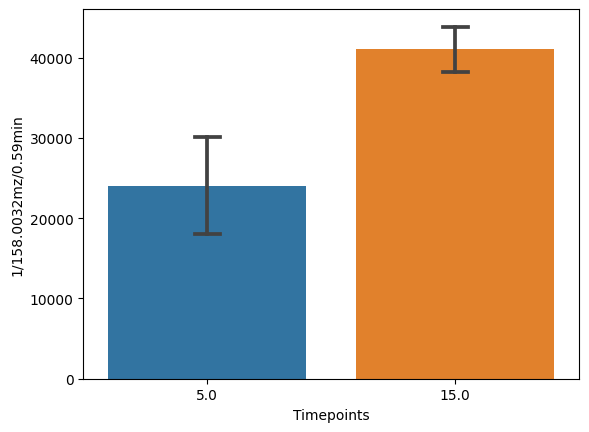

In [49]:
import seaborn as sns
sns.barplot(data=dtpt,
            x="Timepoints", y='1/158.0032mz/0.59min',
            #errorbar='sd', capsize=.1)
            ci='sd', capsize=.1)

In [50]:
?sns.barplot

In [54]:
dtpt.loc[dtpt.Timepoints==5, '1/158.0032mz/0.59min'].tolist()

[29001.8984375, 15537.537109375, 27649.740234375]

In [55]:
dtpt.loc[dtpt.Timepoints==15,'1/158.0032mz/0.59min'].tolist()

[43964.34375, 41871.890625, 37211.8203125]

In [56]:
from scipy import stats
stats.ttest_ind(dtpt.loc[dtpt.Timepoints==5, '1/158.0032mz/0.59min'].tolist(),
                dtpt.loc[dtpt.Timepoints==15,'1/158.0032mz/0.59min'].tolist(),
                equal_var=False)

TtestResult(statistic=-3.589479095457421, pvalue=0.040693989074425466, df=2.8302256089679823)

In [59]:
dtpt = metab.loc[metab['Timepoints'].isin([5, 15]), ['Timepoints', '1/158.0032mz/0.59min', '2/192.0618mz/0.61min']]
Timepoints = dtpt.Timepoints.tolist()
Timepoints.extend(dtpt.Timepoints.tolist())

dtpt = pd.concat([pd.DataFrame(Timepoints, columns=['Timepoints']),
           dtpt[['1/158.0032mz/0.59min', '2/192.0618mz/0.61min']].melt()], axis=1)
dtpt

,Timepoints,variable,value
0,15.0,1/158.0032mz/0.59min,43964.34375
1,15.0,1/158.0032mz/0.59min,41871.890625
2,5.0,1/158.0032mz/0.59min,29001.898438
3,15.0,1/158.0032mz/0.59min,37211.820312
4,5.0,1/158.0032mz/0.59min,15537.537109
5,5.0,1/158.0032mz/0.59min,27649.740234
6,15.0,2/192.0618mz/0.61min,304341.25
7,15.0,2/192.0618mz/0.61min,349812.5
8,5.0,2/192.0618mz/0.61min,415379.90625
9,15.0,2/192.0618mz/0.61min,325810.0625


In [57]:
dtpt = df.loc[df['ATTRIBUTE_Sample'].isin(['A5M', 'A15M']), ['ATTRIBUTE_Sample', 1, 4]]
ATTRIBUTE_Sample = dtpt.ATTRIBUTE_Sample.tolist()
ATTRIBUTE_Sample.extend(dtpt.ATTRIBUTE_Sample.tolist())

dtpt = pd.concat([pd.DataFrame(ATTRIBUTE_Sample, columns=['ATTRIBUTE_Sample']),
           dtpt[[1,4]].melt()], axis=1)
dtpt

,ATTRIBUTE_Sample,variable,value
0,A5M,1,89.26
1,A5M,1,86.08
2,A5M,1,118.90
3,A15M,1,135.80
4,A15M,1,217.20
5,A15M,1,156.10
6,A5M,4,101.00
7,A5M,4,44.89
8,A5M,4,154.50
9,A15M,4,71.06


<Axes: xlabel='variable', ylabel='value'>

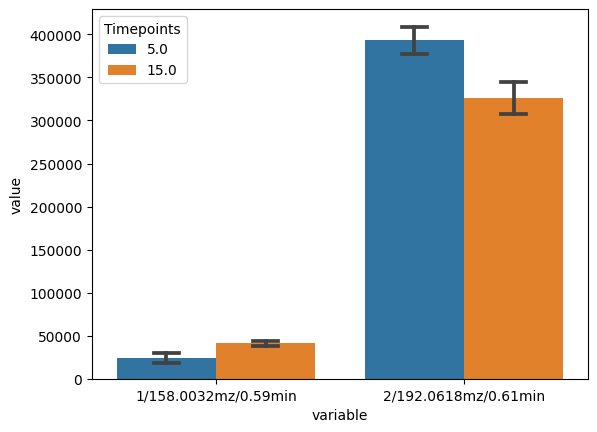

In [60]:
sns.barplot(data=dtpt,
            x="variable", y="value", hue='Timepoints',
            ci="sd", capsize=.1)

<Axes: xlabel='Timepoints', ylabel='1/158.0032mz/0.59min'>

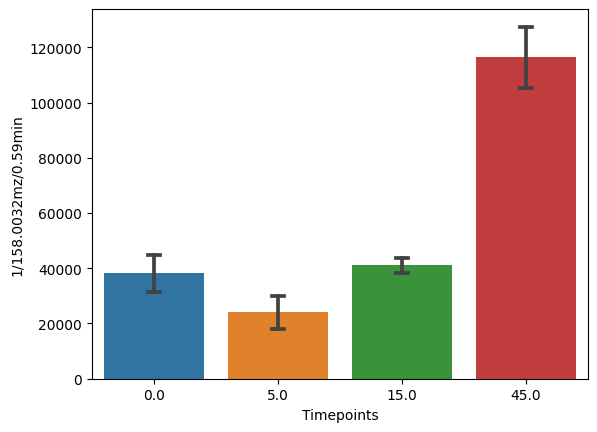

In [63]:
dtpt = metab[['Timepoints', '1/158.0032mz/0.59min']]

sns.barplot(data=dtpt,
            x="Timepoints", y='1/158.0032mz/0.59min',
            ci='sd', capsize=.1)

<Axes: xlabel='ATTRIBUTE_Sample', ylabel='1'>

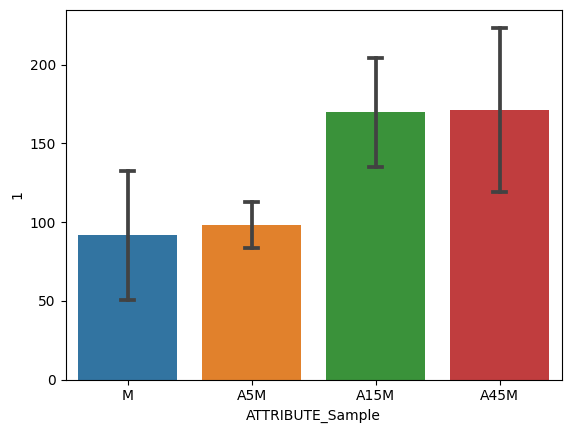

In [62]:
dtpt = df.loc[df['ATTRIBUTE_Sample'].str.contains('M'),
              ['ATTRIBUTE_Sample', 1]]

sns.barplot(data=dtpt,
            x="ATTRIBUTE_Sample", y=1,
            ci='sd', capsize=.1, order=['M', 'A5M', 'A15M', 'A45M'])

<Axes: xlabel='Timepoints', ylabel='1/158.0032mz/0.59min'>

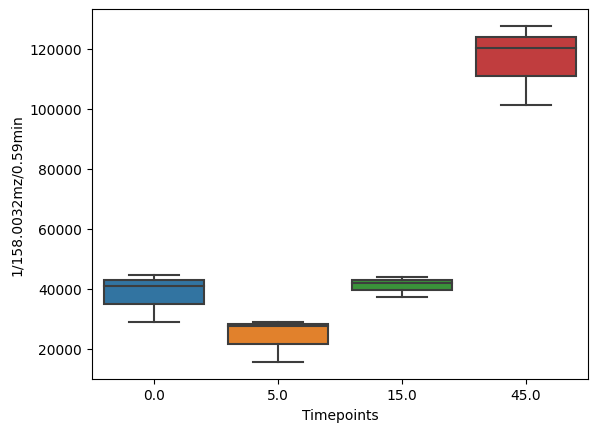

In [64]:
sns.boxplot(data=dtpt, y='1/158.0032mz/0.59min', x='Timepoints')
#plt.xticks(rotation=45)

<Axes: xlabel='Timepoints', ylabel='1/158.0032mz/0.59min'>

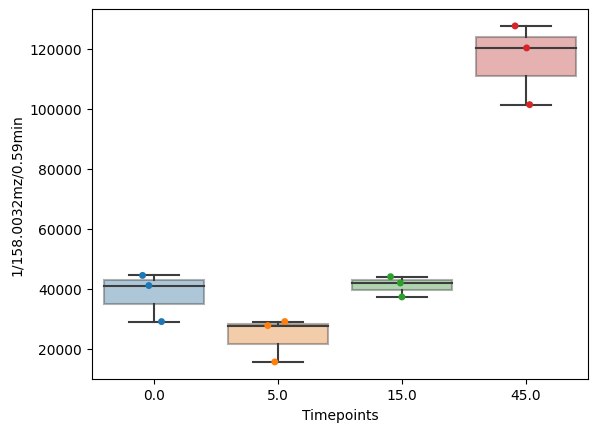

In [65]:
ax = sns.boxplot(data=dtpt, y='1/158.0032mz/0.59min', x='Timepoints', boxprops={'alpha': 0.4})
sns.stripplot(data=dtpt, y='1/158.0032mz/0.59min', x='Timepoints', ax = ax)

In [66]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [67]:
dtpt

,Timepoints,1/158.0032mz/0.59min
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,15.0,43964.34375
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,15.0,41871.890625
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,5.0,29001.898438
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,15.0,37211.820312
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,5.0,15537.537109
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,5.0,27649.740234
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML,0.0,41017.867188
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML,45.0,101349.71875
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML,0.0,28987.046875
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML,0.0,44394.007812


In [68]:
gb = dtpt.groupby('Timepoints')
gb.get_group(5)

,Timepoints,1/158.0032mz/0.59min
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,5.0,29001.898438
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,5.0,15537.537109
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,5.0,27649.740234


In [72]:
[v['1/158.0032mz/0.59min'] for k,v in gb]

[Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML    41017.867188
 Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML    28987.046875
 Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML    44394.007812
 Name: 1/158.0032mz/0.59min, dtype: object,
 Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML    29001.898438
 Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML    15537.537109
 Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML    27649.740234
 Name: 1/158.0032mz/0.59min, dtype: object,
 Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML     43964.34375
 Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML    41871.890625
 Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML    37211.820312
 Name: 1/158.0032mz/0.59min, dtype: object,
 Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML     101349.71875
 Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep2.mzML    120269.664062
 Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep3.mzML    127608.984375
 Name: 1/158.0032mz/0.59min, dtype: object]

In [75]:
f_oneway(*[v['1/158.0032mz/0.59min'] for k, v in gb])

F_onewayResult(statistic=65.9128096652192, pvalue=5.537762642923684e-06)

In [77]:
from scipy.stats import tukey_hsd
res = tukey_hsd(*[v['1/158.0032mz/0.59min'].tolist() for k, v in gb])

print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)  14069.915     0.286 -9172.621 37312.452
 (0 - 2)  -2883.044     0.977-26125.581 20359.492
 (0 - 3) -78276.482     0.000-101519.018-55033.945
 (1 - 0) -14069.915     0.286-37312.452  9172.621
 (1 - 2) -16952.960     0.169-40195.496  6289.577
 (1 - 3) -92346.397     0.000-115588.934-69103.860
 (2 - 0)   2883.044     0.977-20359.492 26125.581
 (2 - 1)  16952.960     0.169 -6289.577 40195.496
 (2 - 3) -75393.438     0.000-98635.974-52150.901
 (3 - 0)  78276.482     0.000 55033.945101519.018
 (3 - 1)  92346.397     0.000 69103.860115588.934
 (3 - 2)  75393.438     0.000 52150.901 98635.974



In [78]:
from scikit_posthocs import posthoc_tukey
posthoc_tukey(dtpt, val_col='1/158.0032mz/0.59min', group_col="Timepoints")

,15.0,5.0,0.0,45.0
15.0,1.000000,0.168768,0.900000,0.001
5.0,0.168768,1.000000,0.285888,0.001
0.0,0.900000,0.285888,1.000000,0.001
45.0,0.001000,0.001000,0.001000,1.000


In [79]:
tukey_df = posthoc_tukey(dtpt, val_col='1/158.0032mz/0.59min', group_col="Timepoints")
tukey_df.melt(ignore_index=False).reset_index()

,index,variable,value
0,15.0,15.0,1.000000
1,5.0,15.0,0.168768
2,0.0,15.0,0.900000
3,45.0,15.0,0.001000
4,15.0,5.0,0.168768
5,5.0,5.0,1.000000
6,0.0,5.0,0.285888
7,45.0,5.0,0.001000
8,15.0,0.0,0.900000
9,5.0,0.0,0.285888


In [80]:
import numpy as np

tukey_df = posthoc_tukey(dtpt, val_col='1/158.0032mz/0.59min', group_col="Timepoints")

remove = np.tril(np.ones(tukey_df.shape), k=0).astype("bool")
tukey_df[remove] = np.nan

molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()
molten_df

,index,variable,value
4,15.0,5.0,0.168768
8,15.0,0.0,0.900000
9,5.0,0.0,0.285888
12,15.0,45.0,0.001000
13,5.0,45.0,0.001000
14,0.0,45.0,0.001000


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5 vs. 15: Custom statistical test, P_val:1.688e-01
0 vs. 5: Custom statistical test, P_val:2.859e-01
15 vs. 45: Custom statistical test, P_val:1.000e-03
0 vs. 15: Custom statistical test, P_val:9.000e-01
5 vs. 45: Custom statistical test, P_val:1.000e-03
0 vs. 45: Custom statistical test, P_val:1.000e-03


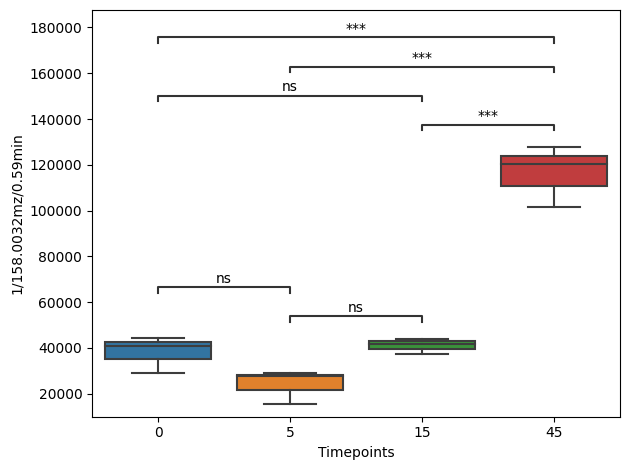

In [81]:
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

ax = sns.boxplot(data=dtpt, x="Timepoints", y='1/158.0032mz/0.59min', order=[0, 5, 15, 45])

pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]

annotator = Annotator(
    ax, pairs, data=dtpt, x="Timepoints", y='1/158.0032mz/0.59min', order=[0, 5, 15, 45]
)
annotator.configure(text_format="star", loc="inside")
annotator.set_pvalues_and_annotate(p_values)

plt.tight_layout()

In [ ]:
#https://blog.4dcu.be/programming/2021/12/30/Posthoc-Statannotations.html

 <a id="5"></a> <br>
## 5 - Executando a análise univariada para todos os metabólitos

Após a inspeção de metabólitos de interesse, e verificação das pressuposições, é possível executar a análise para todos os metabólitos.


In [82]:
from statsmodels.stats.multitest import multipletests

def multi_class(data, cn, fnames, method):
    if len(data.groupby(cn)) <= 2:
        raise Exception('ANOVA requires a secondary index with three or more values')
    if method=='anova':
        func = stats.f_oneway
    elif method=='kruskal':
        func = stats.kruskal
    vstats = []
    for col in fnames:
        cls = []
        for k, v in data[[cn,col]].groupby(cn):
            cls.append(v[col])
        try:
            s = func(*cls)
        except:
            s = (0,1)
        vstats.append(s)
    return pd.DataFrame(vstats)

In [83]:
metab

,Timepoints,1/158.0032mz/0.59min,2/192.0618mz/0.61min,3/151.0355mz/0.61min,4/164.0670mz/0.61min,5/208.0395mz/0.62min,6/167.0129mz/0.62min,7/266.1601mz/0.67min,8/439.1425mz/0.70min,9/341.0520mz/0.70min,...,2442/574.3255mz/13.91min,2443/381.1892mz/13.91min,2444/167.0129mz/13.93min,2445/208.0395mz/13.93min,2446/186.9810mz/13.94min,2447/169.9773mz/13.94min,2448/182.9852mz/13.94min,2449/224.0120mz/13.95min,2450/154.9903mz/13.97min,2451/196.0167mz/13.97min
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,15.0,43964.34375,304341.25,2530460.25,263683.71875,142914.078125,966863.5625,107469.632812,113527.109375,333894.84375,...,555286.25,165805.28125,875280.5625,356077.6875,91706.851562,152794.953125,1637986.0,409119.46875,1328732.625,343620.375
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,15.0,41871.890625,349812.5,2556150.75,306493.0625,125530.742188,856304.875,150324.5,92916.203125,403847.25,...,182388.671875,80163.28125,605581.375,256734.859375,141771.609375,515488.875,1680901.625,453190.09375,1361822.5,372232.71875
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,5.0,29001.898438,415379.90625,2809312.0,351789.09375,128297.414062,855339.5625,116331.335938,25944.050781,186743.625,...,87626.0625,199760.40625,1146227.875,531843.375,170020.28125,201502.015625,528491.9375,435715.0,301592.875,118252.1875
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,15.0,37211.820312,325810.0625,2504642.5,272725.40625,136930.625,895492.875,121917.695312,94558.671875,652180.8125,...,176665.34375,61559.859375,564108.625,241698.8125,87078.882812,489937.8125,599619.75,173435.6875,1352360.0,360889.46875
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,5.0,15537.537109,382802.71875,2725863.5,306817.21875,115490.3125,858469.625,104092.382812,37427.5625,201361.046875,...,62915.101562,62768.578125,590345.625,255869.96875,97476.84375,201783.5,501782.46875,187468.9375,1353263.75,371438.1875
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,5.0,27649.740234,381894.40625,2881478.25,327297.0625,124926.78125,907128.5625,100663.1875,36343.933594,154161.625,...,47807.960938,80110.46875,798421.25,392972.5,157820.03125,461375.15625,1865322.375,456262.78125,325086.375,137025.46875
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML,0.0,41017.867188,381422.375,2840428.75,369220.25,134655.921875,914866.0625,93851.429688,NaN,19208.681641,...,NaN,204846.328125,1412586.375,610687.8125,191581.71875,185045.640625,545191.75,136571.28125,303447.53125,393072.15625
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML,45.0,101349.71875,344960.46875,2378518.25,300194.09375,128417.25,898504.5,40965.789062,3479814.75,2794160.5,...,101533.804688,60430.800781,666759.375,347794.375,166345.53125,645465.5625,1488438.5,466885.59375,322715.6875,392110.6875
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML,0.0,28987.046875,378985.6875,2715104.25,332703.34375,138431.71875,913087.1875,100660.210938,4536.32373,28887.546875,...,22753.771484,37908.066406,610906.8125,313141.75,166530.109375,441130.75,2044898.875,499894.5625,340396.59375,420120.78125
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML,0.0,44394.007812,358590.53125,2734096.25,326618.875,129255.226562,955807.4375,97356.117188,NaN,26846.267578,...,12277.087891,74756.429688,618473.875,250668.0,89660.71875,248534.078125,622918.8125,183020.828125,1322244.75,360173.28125


In [85]:
metab.columns[1:]

Index(['1/158.0032mz/0.59min', '2/192.0618mz/0.61min', '3/151.0355mz/0.61min',
       '4/164.0670mz/0.61min', '5/208.0395mz/0.62min', '6/167.0129mz/0.62min',
       '7/266.1601mz/0.67min', '8/439.1425mz/0.70min', '9/341.0520mz/0.70min',
       '10/363.0338mz/0.70min',
       ...
       '2442/574.3255mz/13.91min', '2443/381.1892mz/13.91min',
       '2444/167.0129mz/13.93min', '2445/208.0395mz/13.93min',
       '2446/186.9810mz/13.94min', '2447/169.9773mz/13.94min',
       '2448/182.9852mz/13.94min', '2449/224.0120mz/13.95min',
       '2450/154.9903mz/13.97min', '2451/196.0167mz/13.97min'],
      dtype='object', length=2451)

In [86]:
# pressuposicoes para teste parametrico razoaveis para dados de metabolomica
tanova = multi_class(metab, 'Timepoints', metab.columns[1:], 'anova')
tanova['pval_cor'] = multipletests(tanova['pvalue'], method='fdr_bh')[1]
sum(tanova['pval_cor'] < 0.05)

0

In [87]:
tanova.head()

,statistic,pvalue,pval_cor
0,65.912810,0.000006,NaN
1,9.473957,0.005199,NaN
2,15.192133,0.001148,NaN
3,5.546300,0.023518,NaN
4,2.032961,0.187878,NaN


In [88]:
(tanova.pvalue < 0.05).sum()

1036

In [89]:
tanova[tanova.pvalue < 0.05]

,statistic,pvalue,pval_cor
0,65.912810,5.537763e-06,NaN
1,9.473957,5.199344e-03,NaN
2,15.192133,1.147892e-03,NaN
3,5.546300,2.351767e-02,NaN
6,28.403617,1.288654e-04,NaN
...,...,...,...
2288,55.605632,1.059314e-05,NaN
2293,30.013343,1.054816e-04,NaN
2302,54.419663,1.149670e-05,NaN
2309,207.974288,6.289174e-08,NaN


In [91]:
metab.columns[1:][2329]

'2330/586.4692mz/11.82min'

In [92]:
dtpt = metab[['Timepoints', metab.columns[1:][2329]]]

In [93]:
dtpt

,Timepoints,2330/586.4692mz/11.82min
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,15.0,34393.484375
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,15.0,31511.144531
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,5.0,33248.589844
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,15.0,30531.328125
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,5.0,29293.519531
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,5.0,11181.131836
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML,0.0,39285.277344
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML,45.0,134907.71875
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML,0.0,6071.175781
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML,0.0,8091.399902


In [95]:
gb = dtpt.groupby('Timepoints')
f_oneway(*[v['2330/586.4692mz/11.82min'] for k, v in gb])

F_onewayResult(statistic=4.299707730079719, pvalue=0.043967463096508265)

In [98]:
tukey_df = posthoc_tukey(dtpt, val_col='2330/586.4692mz/11.82min', group_col='Timepoints')

remove = np.tril(np.ones(tukey_df.shape), k=0).astype("bool")
tukey_df[remove] = np.nan

molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()
molten_df

,index,variable,value
4,15.0,5.0,0.900000
8,15.0,0.0,0.900000
9,5.0,0.0,0.900000
12,15.0,45.0,0.084682
13,5.0,45.0,0.073284
14,0.0,45.0,0.064406


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5.0 vs. 15.0: Custom statistical test, P_val:9.000e-01
0.0 vs. 5.0: Custom statistical test, P_val:9.000e-01
15.0 vs. 45.0: Custom statistical test, P_val:8.468e-02
0.0 vs. 15.0: Custom statistical test, P_val:9.000e-01
5.0 vs. 45.0: Custom statistical test, P_val:7.328e-02
0.0 vs. 45.0: Custom statistical test, P_val:6.441e-02


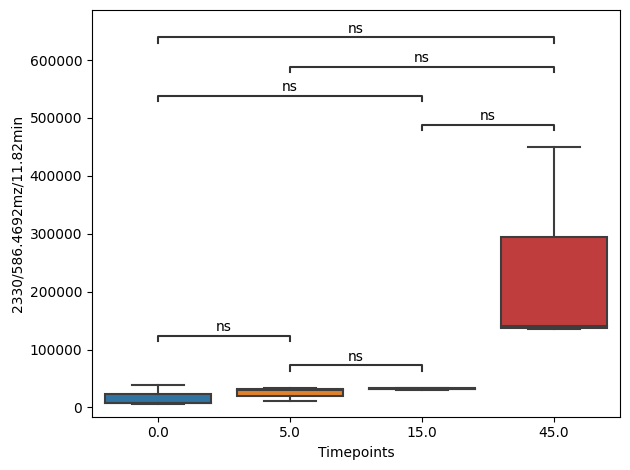

In [100]:
ax = sns.boxplot(data=dtpt, x="Timepoints", y='2330/586.4692mz/11.82min')

pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]

annotator = Annotator(
    ax, pairs, data=dtpt, x="Timepoints", y='2330/586.4692mz/11.82min'
)
annotator.configure(text_format="star", loc="inside")
annotator.set_pvalues_and_annotate(p_values)

plt.tight_layout()

 <a id="6"></a> <br>
## 6 - Volcano plot

Com a intuição do cálculo do teste estatístico para todas as variáveis, podemos agora executar o cálculo do _Volcano Plot_.


In [101]:
feat.head()

id,1,2,3,4,5,6,7,8,9,10,...,27705,27706,27707,27708,27709,27710,27711,27712,27713,27714
Interlab-LC-MS_Lab2_PPL_Pos_MS2_Rep1.mzML,5705.00,911.00,413.10,16710.00,13960.0,3239.0,NaN,1969.0,NaN,3156.0,...,78290.0,9866.0,8157.0,446.8,230.4,40300.0,2062.0,11780.0,NaN,955.6
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML,149.10,91.42,88.61,126.60,NaN,238.9,NaN,6681.0,2595.0,11920.0,...,102000.0,47110.0,14580.0,NaN,NaN,3739.0,475.3,52560.0,34190.0,NaN
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,89.26,81.41,62.66,101.00,NaN,190.0,79.88,4794.0,1443.0,6089.0,...,84610.0,30960.0,11030.0,NaN,NaN,974.1,730.6,46890.0,318.9,NaN
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,135.80,140.10,78.08,71.06,NaN,660.9,NaN,7469.0,2427.0,14420.0,...,93690.0,7087.0,3285.0,NaN,NaN,3841.0,401.8,1446.0,2965.0,NaN
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,118.90,1011.00,1457.00,154.50,NaN,5649.0,6466.00,5464.0,1516.0,5303.0,...,130000.0,15310.0,16350.0,NaN,NaN,828.5,19960.0,7540.0,NaN,NaN


In [102]:
metab[metab.columns[1:]].head()

,1/158.0032mz/0.59min,2/192.0618mz/0.61min,3/151.0355mz/0.61min,4/164.0670mz/0.61min,5/208.0395mz/0.62min,6/167.0129mz/0.62min,7/266.1601mz/0.67min,8/439.1425mz/0.70min,9/341.0520mz/0.70min,10/363.0338mz/0.70min,...,2442/574.3255mz/13.91min,2443/381.1892mz/13.91min,2444/167.0129mz/13.93min,2445/208.0395mz/13.93min,2446/186.9810mz/13.94min,2447/169.9773mz/13.94min,2448/182.9852mz/13.94min,2449/224.0120mz/13.95min,2450/154.9903mz/13.97min,2451/196.0167mz/13.97min
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,43964.34375,304341.25,2530460.25,263683.71875,142914.078125,966863.5625,107469.632812,113527.109375,333894.84375,374690.34375,...,555286.25,165805.28125,875280.5625,356077.6875,91706.851562,152794.953125,1637986.0,409119.46875,1328732.625,343620.375
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,41871.890625,349812.5,2556150.75,306493.0625,125530.742188,856304.875,150324.5,92916.203125,403847.25,480620.34375,...,182388.671875,80163.28125,605581.375,256734.859375,141771.609375,515488.875,1680901.625,453190.09375,1361822.5,372232.71875
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,29001.898438,415379.90625,2809312.0,351789.09375,128297.414062,855339.5625,116331.335938,25944.050781,186743.625,252321.40625,...,87626.0625,199760.40625,1146227.875,531843.375,170020.28125,201502.015625,528491.9375,435715.0,301592.875,118252.1875
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,37211.820312,325810.0625,2504642.5,272725.40625,136930.625,895492.875,121917.695312,94558.671875,652180.8125,434285.625,...,176665.34375,61559.859375,564108.625,241698.8125,87078.882812,489937.8125,599619.75,173435.6875,1352360.0,360889.46875
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,15537.537109,382802.71875,2725863.5,306817.21875,115490.3125,858469.625,104092.382812,37427.5625,201361.046875,251015.265625,...,62915.101562,62768.578125,590345.625,255869.96875,97476.84375,201783.5,501782.46875,187468.9375,1353263.75,371438.1875


In [105]:
metab2 = metab[metab.columns[1:]]
mnfeat = metab2[metab2!=0].min().min()
# Make it optional?
#feat.replace(0, mnfeat*(2/3), inplace=True)
metab.fillna(mnfeat*(2/3), inplace=True)
metab

,Timepoints,1/158.0032mz/0.59min,2/192.0618mz/0.61min,3/151.0355mz/0.61min,4/164.0670mz/0.61min,5/208.0395mz/0.62min,6/167.0129mz/0.62min,7/266.1601mz/0.67min,8/439.1425mz/0.70min,9/341.0520mz/0.70min,...,2442/574.3255mz/13.91min,2443/381.1892mz/13.91min,2444/167.0129mz/13.93min,2445/208.0395mz/13.93min,2446/186.9810mz/13.94min,2447/169.9773mz/13.94min,2448/182.9852mz/13.94min,2449/224.0120mz/13.95min,2450/154.9903mz/13.97min,2451/196.0167mz/13.97min
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,15.0,43964.343750,304341.25000,2530460.25,263683.71875,142914.078125,966863.5625,107469.632812,1.135271e+05,3.338948e+05,...,555286.250000,165805.281250,8.752806e+05,356077.687500,91706.851562,1.527950e+05,1.637986e+06,409119.468750,1.328733e+06,343620.375000
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML,15.0,41871.890625,349812.50000,2556150.75,306493.06250,125530.742188,856304.8750,150324.500000,9.291620e+04,4.038472e+05,...,182388.671875,80163.281250,6.055814e+05,256734.859375,141771.609375,5.154889e+05,1.680902e+06,453190.093750,1.361822e+06,372232.718750
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,5.0,29001.898438,415379.90625,2809312.00,351789.09375,128297.414062,855339.5625,116331.335938,2.594405e+04,1.867436e+05,...,87626.062500,199760.406250,1.146228e+06,531843.375000,170020.281250,2.015020e+05,5.284919e+05,435715.000000,3.015929e+05,118252.187500
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML,15.0,37211.820312,325810.06250,2504642.50,272725.40625,136930.625000,895492.8750,121917.695312,9.455867e+04,6.521808e+05,...,176665.343750,61559.859375,5.641086e+05,241698.812500,87078.882812,4.899378e+05,5.996198e+05,173435.687500,1.352360e+06,360889.468750
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,5.0,15537.537109,382802.71875,2725863.50,306817.21875,115490.312500,858469.6250,104092.382812,3.742756e+04,2.013610e+05,...,62915.101562,62768.578125,5.903456e+05,255869.968750,97476.843750,2.017835e+05,5.017825e+05,187468.937500,1.353264e+06,371438.187500
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML,5.0,27649.740234,381894.40625,2881478.25,327297.06250,124926.781250,907128.5625,100663.187500,3.634393e+04,1.541616e+05,...,47807.960938,80110.468750,7.984212e+05,392972.500000,157820.031250,4.613752e+05,1.865322e+06,456262.781250,3.250864e+05,137025.468750
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML,0.0,41017.867188,381422.37500,2840428.75,369220.25000,134655.921875,914866.0625,93851.429688,2.461003e+03,1.920868e+04,...,2461.003255,204846.328125,1.412586e+06,610687.812500,191581.718750,1.850456e+05,5.451918e+05,136571.281250,3.034475e+05,393072.156250
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML,45.0,101349.718750,344960.46875,2378518.25,300194.09375,128417.250000,898504.5000,40965.789062,3.479815e+06,2.794160e+06,...,101533.804688,60430.800781,6.667594e+05,347794.375000,166345.531250,6.454656e+05,1.488438e+06,466885.593750,3.227157e+05,392110.687500
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML,0.0,28987.046875,378985.68750,2715104.25,332703.34375,138431.718750,913087.1875,100660.210938,4.536324e+03,2.888755e+04,...,22753.771484,37908.066406,6.109068e+05,313141.750000,166530.109375,4.411308e+05,2.044899e+06,499894.562500,3.403966e+05,420120.781250
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML,0.0,44394.007812,358590.53125,2734096.25,326618.87500,129255.226562,955807.4375,97356.117188,2.461003e+03,2.684627e+04,...,12277.087891,74756.429688,6.184739e+05,250668.000000,89660.718750,2.485341e+05,6.229188e+05,183020.828125,1.322245e+06,360173.281250


In [107]:
metab[metab.columns[1:]].isna().sum().sum()

0

In [109]:
(metab[metab.columns[1:]]==0).sum().sum()

0

In [103]:
mnfeat = feat[feat!=0].min().min()
# Make it optional?
#feat.replace(0, mnfeat*(2/3), inplace=True)
feat.fillna(mnfeat*(2/3), inplace=True)
feat.head()

id,1,2,3,4,5,6,7,8,9,10,...,27705,27706,27707,27708,27709,27710,27711,27712,27713,27714
Interlab-LC-MS_Lab2_PPL_Pos_MS2_Rep1.mzML,5705.00,911.00,413.10,16710.00,13960.000000,3239.0,29.926667,1969.0,29.926667,3156.0,...,78290.0,9866.0,8157.0,446.800000,230.400000,40300.0,2062.0,11780.0,29.926667,955.600000
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML,149.10,91.42,88.61,126.60,29.926667,238.9,29.926667,6681.0,2595.000000,11920.0,...,102000.0,47110.0,14580.0,29.926667,29.926667,3739.0,475.3,52560.0,34190.000000,29.926667
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML,89.26,81.41,62.66,101.00,29.926667,190.0,79.880000,4794.0,1443.000000,6089.0,...,84610.0,30960.0,11030.0,29.926667,29.926667,974.1,730.6,46890.0,318.900000,29.926667
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML,135.80,140.10,78.08,71.06,29.926667,660.9,29.926667,7469.0,2427.000000,14420.0,...,93690.0,7087.0,3285.0,29.926667,29.926667,3841.0,401.8,1446.0,2965.000000,29.926667
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML,118.90,1011.00,1457.00,154.50,29.926667,5649.0,6466.000000,5464.0,1516.000000,5303.0,...,130000.0,15310.0,16350.0,29.926667,29.926667,828.5,19960.0,7540.0,29.926667,29.926667


In [ ]:
df[df.ATTRIBUTE_Sample.isin(['A15M', 'A45M'])].index

Index(['Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML',
       'Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML',
       'Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML',
       'Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML',
       'Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep2.mzML',
       'Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep3.mzML'],
      dtype='object')

In [ ]:
feat.index.isin(df[df.ATTRIBUTE_Sample.isin(['A15M'])].index.values)

array([False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False])

In [111]:
feat = metab[metab.columns[1:]]

In [136]:
# normalizacao
feat = feat.apply(lambda a: a/a.sum(), axis=1)
feat.head()

# areas normalizadas de cada amostra tem a mesma soma
feat.sum(axis=1)

Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep1.mzML    1.0
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep3.mzML    1.0
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep1.mzML     1.0
Interlab-LC-MS_Lab2_A15M_Pos_MS2_Rep2.mzML    1.0
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep3.mzML     1.0
Interlab-LC-MS_Lab2_A5M_Pos_MS2_Rep2.mzML     1.0
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep2.mzML       1.0
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep1.mzML    1.0
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep1.mzML       1.0
Interlab-LC-MS_Lab2_M_Pos_MS2_Rep3.mzML       1.0
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep2.mzML    1.0
Interlab-LC-MS_Lab2_A45M_Pos_MS2_Rep3.mzML    1.0
dtype: float64

In [137]:
feat.index.isin(metab[metab.Timepoints.isin([15])].index.values)

array([ True,  True, False,  True, False, False, False, False, False,
       False, False, False])

In [138]:
idx0 = feat.index.isin(metab[metab.Timepoints.isin([15])].index.values)
idx1 = feat.index.isin(metab[metab.Timepoints.isin([45])].index.values)
ttest = feat.apply(lambda a: stats.ttest_ind(a[idx0], a[idx1], equal_var = False)).T
# tkruskal = feat.apply(lambda a: stats.kruskal(a[idx0], a[idx1])).T
ttest.columns = ['statistic', 'pvalue']
pvals = ttest['pvalue']
pcor = multipletests(pvals, method='fdr_bh')[1]

In [139]:
(pvals<0.05).sum()

1176

In [140]:
(pcor<0.05).sum()

971

In [141]:
ttest['pcor'] = pcor

In [142]:
ttest.head()

,statistic,pvalue,pcor
1/158.0032mz/0.59min,-6.731208,0.007120,0.023550
2/192.0618mz/0.61min,11.984385,0.000448,0.004501
3/151.0355mz/0.61min,13.265419,0.000451,0.004501
4/164.0670mz/0.61min,7.827822,0.001862,0.010182
5/208.0395mz/0.62min,5.250851,0.021011,0.052123


In [144]:
fchange = feat.apply(lambda a: np.mean(a[idx0])/np.mean(a[idx1]))

vdf = pd.DataFrame([np.log2(fchange.tolist()),
                    -np.log10(pvals.tolist()),
                    -np.log10(pcor.tolist())]).T

vdf.columns = ['fold_change', 'p-value', 'fdr']
vthr = 2

pthr = -np.log10(0.05)
vdf['Class'] = ''
vdf['Class'] = vdf.apply(lambda a:
                        '15' if a['fold_change']>vthr and a['fdr']>pthr
                        else ('45'
                        if a['fold_change'] < -vthr and a['fdr']>pthr
                        else 'Below Threshold') , axis=1)
palette = {'15': 'red',
          '45': 'blue',
          'Below Threshold': 'grey'}

In [145]:
vdf.head()

,fold_change,p-value,fdr,Class
0,-0.954160,2.147536,1.628011,Below Threshold
1,0.472787,3.348656,2.346704,Below Threshold
2,0.573119,3.345423,2.346704,Below Threshold
3,0.461007,2.729978,1.992155,Below Threshold
4,0.574272,1.677558,1.282971,Below Threshold


In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('ggplot')

def plot_volcano(vdf,  palette, mode='show', filename=None):
    ax = sns.scatterplot(x="fold_change", y="p-value",
                         hue="Class", data=vdf,
                         palette=palette, s=5)
    ax.set(xlabel='log 2 fold change', ylabel='-log10 p-value')
    if mode=='show':
        plt.show()
    elif mode=='pdf':
        with PdfPages(filename) as pdf:
            pdf.savefig()
            plt.close()

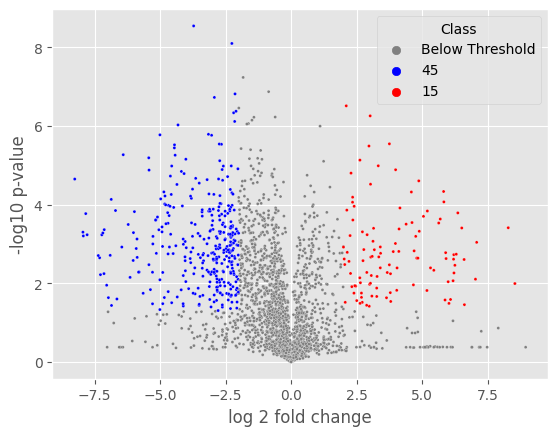

In [128]:
plot_volcano(vdf, palette, mode='show')

In [ ]:
?sns.scatterplot

[Text(0.5, 0, 'log 2 fold change'), Text(0, 0.5, '-log10 p-value')]

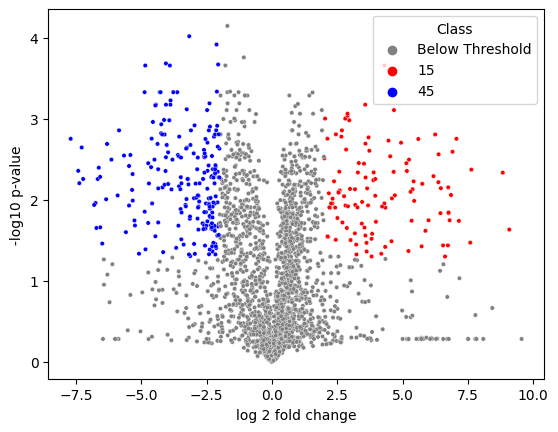

In [146]:
#https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('default')


ax = sns.scatterplot(x="fold_change", y="fdr",
                         hue="Class", data=vdf,
                         palette=palette, s=10)
ax.set(xlabel='log 2 fold change', ylabel='-log10 p-value')

In [147]:
np.log2(2)

1.0

$\log_{10} 0.01 = -2$

$10^{-2} = \frac{1}{10^2} = 0.01$

In [148]:
np.log10(0.01)

-2.0

In [ ]:
import requests
import io

base_url = 'https://gnps2.org/resultfile?task='
taskid = 'd4ae02397d824f529fb96708f951f261'

url_to_db = f'{base_url}{taskid}&file=nf_output/library/merged_results_with_gnps.tsv'
base_url = 'https://gnps2.org/resultfile?task='
dbmatch = pd.read_csv(io.StringIO(requests.get(url_to_db).text), sep='\t')

In [ ]:
dbmatch.head()

,SpectrumID,Compound_Name,Ion_Source,Instrument,Compound_Source,PI,Data_Collector,Adduct,Precursor_MZ,ExactMass,...,tags,molecular_formula,InChIKey,InChIKey-Planar,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway
0,CCMSLIB00009946285,Suspect related to Dimethyl azelate (predicted...,ESI,Orbitrap,Crude,Pieter Dorrestein,Wout Bittremieux,[M-CH4O+H]+,170.118,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CCMSLIB00009926887,Suspect related to .omega.-3 Arachidonic acid ...,ESI,Orbitrap,Crude,Pieter Dorrestein,Wout Bittremieux,[M+H]+,181.122,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CCMSLIB00003139889,Spectral Match to N-Acetyl-D-glucosamine from ...,ESI,qTof,Isolated,Data from Chris Turck,Data deposited by fevargas,M+H-H2O,204.086,221.09,...,NaN,C8H15NO6,OVRNDRQMDRJTHS-RTRLPJTCSA-N,OVRNDRQMDRJTHS,Organic oxygen compounds,Organooxygen compounds,Carbohydrates and carbohydrate conjugates,Aminosugars and aminoglycosides,Aminosugars,Carbohydrates
3,CCMSLIB00009946611,Suspect related to Dodecanedioic acid (predict...,ESI,Orbitrap,Crude,Pieter Dorrestein,Wout Bittremieux,[M-2H2O+H]+,239.127,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CCMSLIB00009978526,Suspect related to Palmitelaidic acid (predict...,ESI,Orbitrap,Crude,Pieter Dorrestein,Wout Bittremieux,[M+H]+,226.180,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dbmatch.shape

(741, 45)

In [ ]:
dbmatch.columns

Index(['SpectrumID', 'Compound_Name', 'Ion_Source', 'Instrument',
       'Compound_Source', 'PI', 'Data_Collector', 'Adduct', 'Precursor_MZ',
       'ExactMass', 'Charge', 'CAS_Number', 'Pubmed_ID', 'Smiles', 'INCHI',
       'INCHI_AUX', 'Library_Class', 'IonMode', 'UpdateWorkflowName',
       'LibraryQualityString', '#Scan#', 'SpectrumFile', 'LibraryName',
       'MQScore', 'Organism', 'TIC_Query', 'RT_Query', 'MZErrorPPM',
       'SharedPeaks', 'MassDiff', 'LibMZ', 'SpecMZ', 'SpecCharge',
       'FileScanUniqueID', 'NumberHits', 'tags', 'molecular_formula',
       'InChIKey', 'InChIKey-Planar', 'superclass', 'class', 'subclass',
       'npclassifier_superclass', 'npclassifier_class',
       'npclassifier_pathway'],
      dtype='object')

In [ ]:
dbmatch['#Scan#'].duplicated().sum()

0

In [ ]:
feat.shape

(13, 27564)

In [ ]:
vdf.shape

(27564, 4)

In [ ]:
vdf['#Scan#'] = feat.columns
vdf.head()

,fold_change,p-value,fdr,Class,#Scan#
0,-0.013819,0.012051,NaN,Below Threshold,1
1,0.469951,0.262962,NaN,Below Threshold,2
2,-0.040396,0.019989,NaN,Below Threshold,3
3,-0.054481,0.046046,NaN,Below Threshold,4
4,0.000000,NaN,NaN,Below Threshold,5


In [ ]:
vdf2 = pd.merge(dbmatch[['#Scan#', 'Compound_Name']], vdf, on='#Scan#')
vdf2

,#Scan#,Compound_Name,fold_change,p-value,fdr,Class
0,7421,Suspect related to Dimethyl azelate (predicted...,4.633482,3.598668,NaN,A15M
1,12632,Suspect related to .omega.-3 Arachidonic acid ...,-1.947129,3.471105,NaN,Below Threshold
2,1086,Spectral Match to N-Acetyl-D-glucosamine from ...,0.464564,1.733597,NaN,Below Threshold
3,10742,Suspect related to Dodecanedioic acid (predict...,-1.424615,2.607365,NaN,Below Threshold
4,13768,Suspect related to Palmitelaidic acid (predict...,3.725417,2.205707,NaN,A15M
...,...,...,...,...,...,...
736,10544,rhapontigenin,0.115359,0.927824,NaN,Below Threshold
737,18255,"Suspect related to 13[(2R,3S)-3-Pentyloxiranyl...",1.326316,0.588885,NaN,Below Threshold
738,18301,"Suspect related to 15-Hydroxy-11Z,13E-eicosadi...",0.154917,0.154581,NaN,Below Threshold
739,3795,Suspect related to Genipin (predicted molecula...,2.797225,4.468584,NaN,A15M


[Text(0.5, 0, 'log 2 fold change'), Text(0, 0.5, '-log10 p-value')]

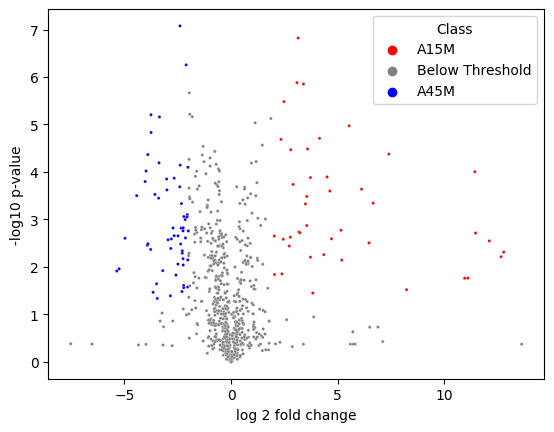

In [ ]:
ax = sns.scatterplot(x="fold_change", y="p-value",
                         hue="Class", data=vdf2,
                         palette=palette, s=5)
ax.set(xlabel='log 2 fold change', ylabel='-log10 p-value')

In [ ]:
vdf2.reindex(vdf2['fold_change'].abs().sort_values(ascending=False).index)

,#Scan#,Compound_Name,fold_change,p-value,fdr,Class
454,25433,DG(20:4_18:0),13.627285,0.374019,NaN,Below Threshold
338,16429,Suspect related to Spectral Match to Monopalmi...,12.783524,2.311064,NaN,A15M
156,14870,Spectral Match to 1-Myristoyl-sn-glycero-3-pho...,12.665556,2.215277,NaN,A15M
147,11627,0055_Triethylcitrate [IIN-based: Match],12.115536,2.548872,NaN,A15M
166,13008,Suspect related to Dodecanedioic acid (predict...,11.464840,2.714039,NaN,A15M
...,...,...,...,...,...,...
340,12704,enoxolone CollisionEnergy:102040,0.000000,NaN,NaN,Below Threshold
346,12712,"(3beta,20beta)-29-hydroxy-11,29-dioxoolean-12-...",0.000000,NaN,NaN,Below Threshold
551,12710,"Glycyrrhizic Acid, Ammonium Salt",0.000000,NaN,NaN,Below Threshold
358,9503,Suspect related to Spectral Match to Decaethyl...,0.000000,NaN,NaN,Below Threshold


[Text(0.5, 0, 'log 2 fold change'), Text(0, 0.5, '-log10 p-value')]

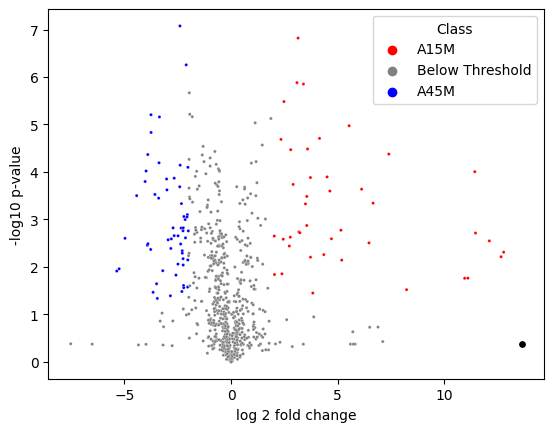

In [ ]:
ax = sns.scatterplot(x="fold_change", y="p-value",
                         hue="Class", data=vdf2,
                         palette=palette, s=5)
ax.scatter(vdf2.loc[454, 'fold_change'], vdf2.loc[454, 'p-value'],
           s=15, c='black')
ax.set(xlabel='log 2 fold change', ylabel='-log10 p-value')

[Text(0.5, 0, 'log 2 fold change'), Text(0, 0.5, '-log10 p-value')]

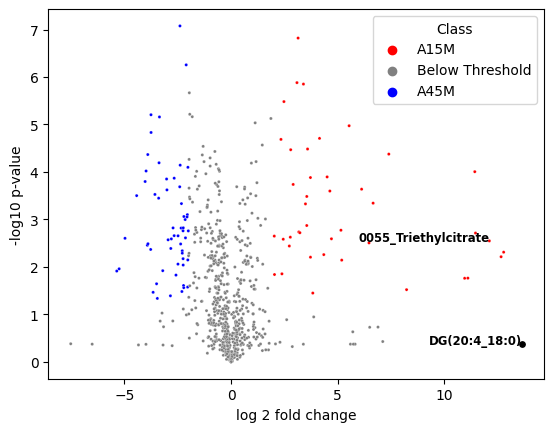

In [ ]:
ax = sns.scatterplot(x="fold_change", y="p-value",
                         hue="Class", data=vdf2,
                         palette=palette, s=5)
ax.scatter(vdf2.loc[454, 'fold_change'], vdf2.loc[454, 'p-value'],
           s=15, c='black')
ax.text(vdf2.loc[454, 'fold_change'], vdf2.loc[454, 'p-value'],
        vdf2.loc[454, 'Compound_Name'], horizontalalignment='right',
        size='small', color='black', weight='semibold')
ax.text(vdf2.loc[147, 'fold_change'], vdf2.loc[147, 'p-value'],
        '0055_Triethylcitrate', horizontalalignment='right',
        size='small', color='black', weight='semibold')
ax.set(xlabel='log 2 fold change', ylabel='-log10 p-value')

In [131]:
import plotly.express as px
px.scatter(vdf, x="fold_change", y="p-value",
          color="Class",
           color_discrete_map=palette)

In [133]:
vdf['Compound_Name'] = feat.columns
vdf.head()

,fold_change,p-value,fdr,Class,Compound_Name
0,-1.504949,2.123726,1.623123,Below Threshold,1/158.0032mz/0.59min
1,-0.073374,0.487267,0.355842,Below Threshold,2/192.0618mz/0.61min
2,0.024248,0.277303,0.211624,Below Threshold,3/151.0355mz/0.61min
3,-0.084921,0.473914,0.344881,Below Threshold,4/164.0670mz/0.61min
4,0.023277,0.122744,0.094751,Below Threshold,5/208.0395mz/0.62min


In [134]:
import plotly.express as px
px.scatter(vdf, x="fold_change", y="p-value",
          color="Class", hover_data=['Compound_Name'],
           color_discrete_map=palette)

In [ ]:
import plotly.express as px
px.scatter(vdf2, x="fold_change", y="p-value",
          color="Class", hover_data=['Compound_Name'],
           color_discrete_map=palette)